In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
df=pd.read_csv("social_media_analytics_dataset.csv")

In [61]:
df.head()

PostID   Platform     UserID       PostDate  Engagements  SentimentScore  \
0  post_1    Twitter  user_1072  1/1/2023 0:00           61               0   
1  post_2   LinkedIn  user_5197  1/1/2023 0:01           43               1   
2  post_3  Instagram  user_8096  1/1/2023 0:02           45               1   
3  post_4  Instagram  user_9811  1/1/2023 0:03           37               1   
4  post_5   Facebook  user_6491  1/1/2023 0:04           53               0   

  Hashtags         Region ContentType TrendTopic  Impressions  Clicks  Shares  \
0  #social           Asia       image         No          520      27       4   
1    #news         Africa        text         No          500      38       5   
2   #trend         Africa        text         No          492      39       5   
3    #news         Europe       video         No          494      27       5   
4   #trend  North America        text        Yes          506      21       5   

   Comments  Gender  Age  
0        11   Other   24  
1        13   Other   28  
2         7   Other   18  
3        15  Female   20  
4         9  Female   68

In [62]:
df.shape

(20000, 16)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   PostID          20000 non-null  object
 1   Platform        20000 non-null  object
 2   UserID          20000 non-null  object
 3   PostDate        20000 non-null  object
 4   Engagements     20000 non-null  int64 
 5   SentimentScore  20000 non-null  int64 
 6   Hashtags        17065 non-null  object
 7   Region          20000 non-null  object
 8   ContentType     20000 non-null  object
 9   TrendTopic      20000 non-null  object
 10  Impressions     20000 non-null  int64 
 11  Clicks          20000 non-null  int64 
 12  Shares          20000 non-null  int64 
 13  Comments        20000 non-null  int64 
 14  Gender          20000 non-null  object
 15  Age             20000 non-null  int64 
dtypes: int64(7), object(9)
memory usage: 2.4+ MB


In [64]:
df.describe()

Engagements  SentimentScore   Impressions        Clicks        Shares  \
count  20000.000000    20000.000000  20000.000000  20000.000000  20000.000000   
mean      50.010400       -0.011900    499.488000     29.976200      4.961650   
std        7.109699        0.815899     22.465845      5.512064      2.212719   
min       24.000000       -1.000000    415.000000     12.000000      0.000000   
25%       45.000000       -1.000000    484.000000     26.000000      3.000000   
50%       50.000000        0.000000    499.000000     30.000000      5.000000   
75%       55.000000        1.000000    515.000000     34.000000      6.000000   
max       81.000000        1.000000    604.000000     57.000000     17.000000   

           Comments           Age  
count  20000.000000  20000.000000  
mean      10.048900     40.676900  
std        3.179766     21.158445  
min        0.000000     18.000000  
25%        8.000000     25.000000  
50%       10.000000     35.000000  
75%       12.000000     45.000000  
max       26.000000     99.000000

In [65]:
df.isna().sum()

PostID               0
Platform             0
UserID               0
PostDate             0
Engagements          0
SentimentScore       0
Hashtags          2935
Region               0
ContentType          0
TrendTopic           0
Impressions          0
Clicks               0
Shares               0
Comments             0
Gender               0
Age                  0
dtype: int64

In [66]:
df.duplicated().sum()

0

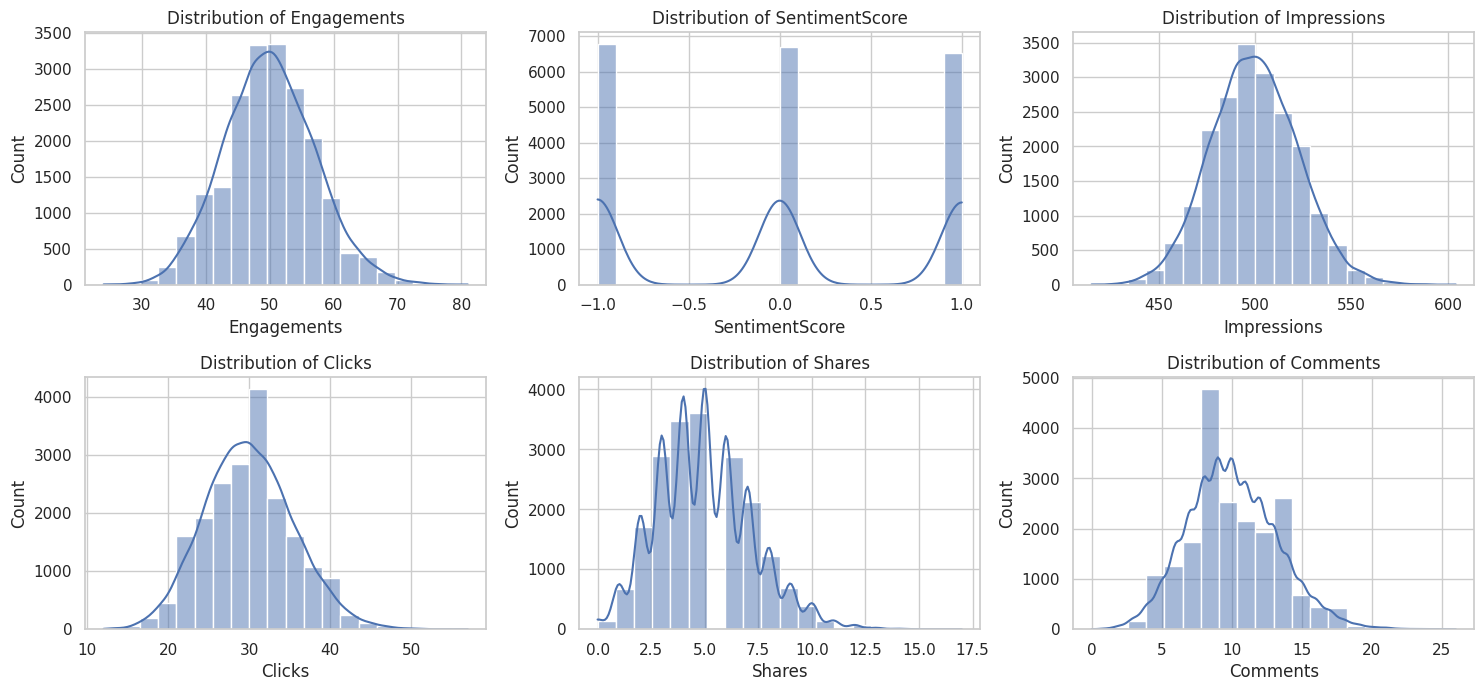

In [67]:
# Set the style for the plots
sns.set(style="whitegrid")

# Histograms for numerical columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(['Engagements', 'SentimentScore', 'Impressions', 'Clicks', 'Shares', 'Comments'], 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

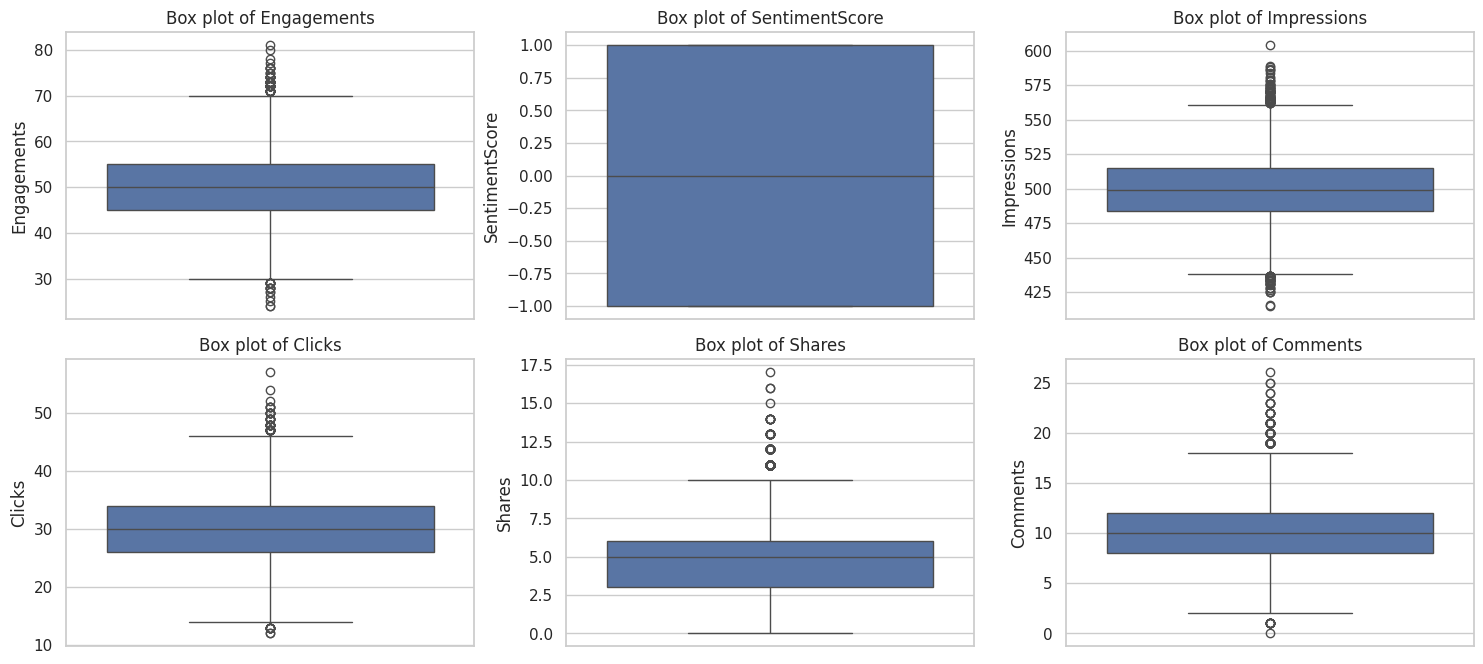

In [68]:
# Box Plots for outlier detection
plt.figure(figsize=(15, 10))
for i, col in enumerate(['Engagements', 'SentimentScore', 'Impressions', 'Clicks', 'Shares', 'Comments'], 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.show()

In [69]:
# Count Plot for categorical variable (e.g., Platform)
plt.figure(figsize=(10, 6))
sns.countplot(x='Platform', data=df)
plt.title('Count of Posts by Platform')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.show()


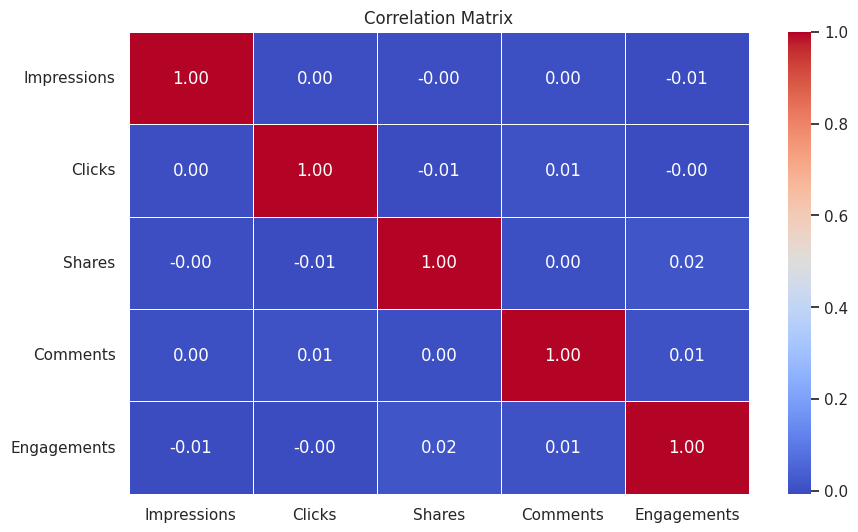

In [70]:
# Correlation matrix and heatmap
correlation_matrix = df[['Impressions', 'Clicks', 'Shares', 'Comments', 'Engagements']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [71]:
# Convert the PostDate column to datetime format and reformat it
df['PostDate'] = pd.to_datetime(df['PostDate']).dt.strftime('%Y-%m-%d %H:%M:%S')

# Display a sample of the updated dataset
df[['PostDate']].head()

PostDate
0  2023-01-01 00:00:00
1  2023-01-01 00:01:00
2  2023-01-01 00:02:00
3  2023-01-01 00:03:00
4  2023-01-01 00:04:00

In [72]:
df["PostID"] = df["PostID"].str.replace("post_", "", regex=False).astype(int)
df["UserID"] = df["UserID"].str.replace("user_", "", regex=False).astype(int)

In [73]:
# Calculate the mode of the 'Hashtags' column
hashtags_mode = df['Hashtags'].mode()[0]  # Take the first mode if there are multiple


In [74]:
# Fill missing values in the 'Hashtags' column using the mode
df['Hashtags'] = df['Hashtags'].fillna(hashtags_mode)

In [75]:
def replace_outliers_with_median(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    median = column.median()
    column = column.where((column >= lower_bound) & (column <= upper_bound), median)
    return column

In [76]:
# Apply the function to relevant columns
df['Engagements'] = replace_outliers_with_median(df['Engagements'])
df['Clicks'] = replace_outliers_with_median(df['Clicks'])
df['Shares'] = replace_outliers_with_median(df['Shares'])
df['Comments'] = replace_outliers_with_median(df['Comments'])

In [77]:
# Create a new column 'shares_comments_sum' by adding 'Shares' and 'Comments'
df['shares_comments_sum'] = df['Shares'] + df['Comments']

# Grouped data analysis
grouped_data = df.groupby('PostDate')[['Shares', 'Comments']].sum().reset_index()

# Adding a new column for shares_comments_sum in the grouped data
grouped_data['shares_comments_sum'] = grouped_data['Shares'] + grouped_data['Comments']

# Display the grouped data
print(grouped_data[['PostDate', 'Shares', 'Comments', 'shares_comments_sum']])


                  PostDate  Shares  Comments  shares_comments_sum
0      2023-01-01 00:00:00       4        11                   15
1      2023-01-01 00:01:00       5        13                   18
2      2023-01-01 00:02:00       5         7                   12
3      2023-01-01 00:03:00       5        15                   20
4      2023-01-01 00:04:00       5         9                   14
...                    ...     ...       ...                  ...
19995  2023-01-14 21:15:00       2         6                    8
19996  2023-01-14 21:16:00       2        13                   15
19997  2023-01-14 21:17:00       4        13                   17
19998  2023-01-14 21:18:00       4        14                   18
19999  2023-01-14 21:19:00       3        14                   17

[20000 rows x 4 columns]


In [78]:
# Define a function to categorize ages into custom bins
def categorize_age(age):
    if age <= 17:
        return 'Children/Teenagers'
    elif 18 <= age <= 24:
        return 'Young Adults'
    elif 25 <= age <= 34:
        return 'Adults'
    elif 35 <= age <= 54:
        return 'Middle-Aged'
    else:
        return 'Seniors'

# Apply the function to the Age column
df['AgeGroup'] = df['Age'].apply(categorize_age)

# Display a sample of the updated dataset
df[['Age', 'AgeGroup']].head()


Age      AgeGroup
0   24  Young Adults
1   28        Adults
2   18  Young Adults
3   20  Young Adults
4   68       Seniors

In [79]:
# Define a function to categorize sentiment scores
def encode_sentiment(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

# Apply the function to replace the SentimentScore column with encoded labels
df['SentimentScore'] = df['SentimentScore'].apply(encode_sentiment)

# Verify the distribution of the updated column
label_distribution = df['SentimentScore'].value_counts()
print(label_distribution)

SentimentScore
Negative    6777
Neutral     6684
Positive    6539
Name: count, dtype: int64


In [80]:
# Regional sentiment analysis with encoded sentiment scores
regional_sentiment = (
    df.groupby('Region')['SentimentScore']
    .agg(lambda x: x.mode()[0])  # Get the most common sentiment in each region
    .reset_index()
)

# Rename the columns for clarity
regional_sentiment = regional_sentiment.rename(columns={'SentimentScore': 'DominantSentiment'})

# Sort the results by the region name for presentation (optional)
regional_sentiment = regional_sentiment.sort_values(by='Region')

In [81]:
# Display the result
print(regional_sentiment)

          Region DominantSentiment
0         Africa          Negative
1           Asia          Negative
2         Europe          Negative
3  North America          Positive
4        Oceania           Neutral
5  South America          Negative


In [82]:
# Average sentiment score replaced with dominant sentiment by Region and AgeGroup
region_agegroup_sentiment = (
    df.groupby(['Region', 'AgeGroup'])['SentimentScore']
    .agg(lambda x: x.mode()[0])  # Get the most frequent sentiment for each combination
    .reset_index()
)

# Rename the columns for clarity
region_agegroup_sentiment = region_agegroup_sentiment.rename(columns={'SentimentScore': 'DominantSentiment'})

# Display the results
print("Dominant Sentiment by Region and Age Group:")
print(region_agegroup_sentiment)

Dominant Sentiment by Region and Age Group:
           Region      AgeGroup DominantSentiment
0          Africa        Adults          Negative
1          Africa   Middle-Aged           Neutral
2          Africa       Seniors           Neutral
3          Africa  Young Adults          Negative
4            Asia        Adults          Positive
5            Asia   Middle-Aged          Negative
6            Asia       Seniors          Negative
7            Asia  Young Adults          Negative
8          Europe        Adults           Neutral
9          Europe   Middle-Aged           Neutral
10         Europe       Seniors          Negative
11         Europe  Young Adults          Negative
12  North America        Adults           Neutral
13  North America   Middle-Aged          Positive
14  North America       Seniors           Neutral
15  North America  Young Adults          Positive
16        Oceania        Adults          Negative
17        Oceania   Middle-Aged          Negative
18    

In [83]:
# Dominant sentiment by Region and Gender
region_gender_sentiment = (
    df.groupby(['Region', 'Gender'])['SentimentScore']
    .agg(lambda x: x.mode()[0])  # Get the most frequent sentiment for each combination
    .reset_index()
)

# Rename the columns for clarity
region_gender_sentiment = region_gender_sentiment.rename(columns={'SentimentScore': 'DominantSentiment'})

# Display the results
print("Dominant Sentiment by Region and Gender:")
print(region_gender_sentiment)


Dominant Sentiment by Region and Gender:
           Region  Gender DominantSentiment
0          Africa  Female          Negative
1          Africa    Male          Negative
2          Africa   Other           Neutral
3            Asia  Female          Negative
4            Asia    Male           Neutral
5            Asia   Other          Negative
6          Europe  Female          Negative
7          Europe    Male           Neutral
8          Europe   Other          Negative
9   North America  Female           Neutral
10  North America    Male          Positive
11  North America   Other          Negative
12        Oceania  Female          Positive
13        Oceania    Male           Neutral
14        Oceania   Other           Neutral
15  South America  Female          Negative
16  South America    Male          Positive
17  South America   Other          Negative


In [84]:
# Save the updated dataset
updated_file_path = 'labeled_social_media_analytics_dataset.csv'
df.to_csv(updated_file_path, index=False)

print(f"Updated dataset with sentiment labels saved to: {updated_file_path}")

Updated dataset with sentiment labels saved to: labeled_social_media_analytics_dataset.csv
